Activity focuses on comparing the convergence and speed of gradient descent and stochastic gradient descent

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression, SGDRegressor
import warnings
warnings.simplefilter(action='ignore')

In [11]:
#synthetic dataset y = 3x
np.random.seed(42)
X = pd.DataFrame(np.linspace(0, 10, 100))
y = 3*X + np.random.normal(scale = 5, size = 100).reshape(-1, 1)

In [12]:
#mean squared error function
def mse(theta, X = X, y = y):
    return np.mean((y - theta*X)**2)

In [13]:
#derivative function for mse
def df(theta, X = X, y = y):
    return (mse(theta + 0.001, X = X, y = y) - mse(theta,X = X, y = y))/0.001

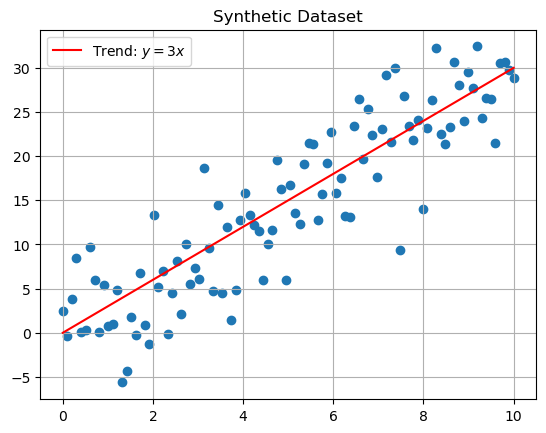

In [14]:
#dataset and "true" line
xs = np.linspace(0, 10, 100)
plt.scatter(X, y)
plt.plot(xs, 3*xs, color = 'red', label = r'Trend: $y = 3x$')
plt.title('Synthetic Dataset')
plt.grid()
plt.legend();

CPU times: user 2 μs, sys: 0 ns, total: 2 μs
Wall time: 4.29 μs
[np.float64(2.9395105740065013), np.float64(2.939510401596472), np.float64(2.9395102407384925), np.float64(2.9395100906585334), np.float64(2.939509950634438)]


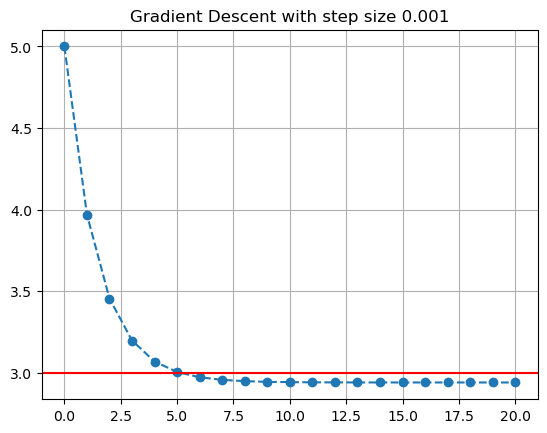

In [15]:
%time
thetas = [5]
for i in range(200):
    # complete the gradient descent update
    theta_next = thetas[-1] - 0.001*df(theta = thetas[-1])
    #thetas.append(theta_next.values[0])
    thetas.append(theta_next)

print(thetas[-5:])
plt.plot(thetas[::10], '--o')
plt.axhline(3, color = 'red')
plt.grid()
plt.title('Gradient Descent with step size 0.001');

CPU times: user 2 μs, sys: 0 ns, total: 2 μs
Wall time: 4.53 μs


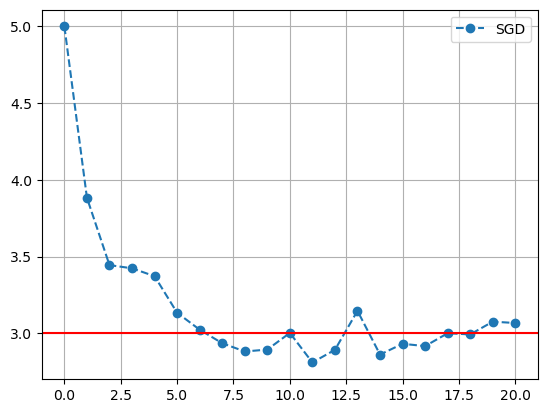

In [16]:
%time
thetas_sgd = [5]
for i in range(200):
    x_sample = X.sample(1, random_state = i)
    y_sample = y.iloc[x_sample.index.values]
    x_next = thetas_sgd[-1] - 0.001*df(theta = thetas_sgd[-1], X = x_sample, y = y_sample)
    thetas_sgd.append(x_next)
    
plt.plot(thetas_sgd[::10], '--o', label = 'SGD')
plt.axhline(3, color = 'red')
plt.grid()
plt.legend();

Both methods converge and took similar time

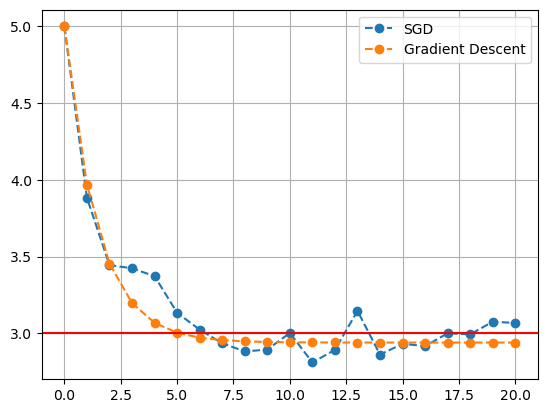

In [17]:
plt.plot(thetas_sgd[::10], '--o', label = 'SGD')
plt.plot(thetas[::10], '--o', label = 'Gradient Descent')
plt.axhline(3, color = 'red')
plt.grid()
plt.legend();

Using the SGD approach did not result in much of a speed difference.  This is mainly due to the size of the array and scale of the problem.  As stated in the scikitlearn `SGDRegressor` user guide [here](https://scikit-learn.org/stable/modules/sgd.html#regression), SGD will usually require a larger number of observations(> 10,000) to be noticeably faster.